In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import ipywidgets as widget
from IPython.core.display import display, HTML
%matplotlib inline

conn = sqlite3.connect('/home/jelmert/PycharmProjects/decide-exchange-model/data/output/decide-data_1.db')



In [2]:
cursor = conn.execute('SELECT `name`, `id` FROM actor ORDER BY `name`')
actors = cursor.fetchall()

# for actor, actor_id in actors:
df = pd.read_sql_query("""
        SELECT COUNT(*)/1000 exchanges_count, SUM(ea.eu)/1000 utility_sum, AVG(ea.eu) utility_avg, a.name as actor, m.p FROM exchangeactor ea
          JOIN actor a on ea.actor_id = a.id
          JOIN exchange e on ea.id = e.i_id
          JOIN iteration i on e.iteration_id = i.id
          JOIN repetition r on i.repetition_id = r.id
          JOIN modelrun m on r.model_run_id = m.id
          GROUP BY a.id, m.p;
        """, 
                         conn,                          
                         index_col=['actor', 'p'],                 
                        )
    

In [3]:
df_exchanges_count = pd.pivot_table(df, index=['p'], columns=['actor'], values=['exchanges_count'])
df_exchanges_count

exchanges_count                                \
actor           AILAC AILAC2 ALBA AOSIS African_grp   
p                                                     
0.0               3.0    0.0  1.5  1.25        2.25   
0.1               0.0    NaN  0.0  0.00        0.00   
0.2               0.0    NaN  0.0  0.00        0.00   
0.8              10.0    0.0  3.0  2.50        5.00   

                                                                          \
actor Alliance of Small Island States Arab_states Arab_statess Australia   
p                                                                          
0.0                               0.0         3.0          0.0       0.0   
0.1                               0.0         0.0          NaN       0.0   
0.2                               0.0         0.0          NaN       0.0   
0.8                               NaN         9.0          0.0       NaN   

                 ...                                                        \
actor Brazil     ...       EIG EU (incl Norway)  EU28 India Japan LDCs_BGD   
p                ...                                                         
0.0      1.6     ...       1.5              0.0  2.25   1.5   1.2     1.25   
0.1      0.0     ...       0.0              0.0  0.00   0.0   0.0     0.00   
0.2      0.0     ...       0.0              0.0  0.00   0.0   0.0     0.00   
0.8      4.0     ...       3.0              NaN  4.50   3.0   3.5     2.50   

                                                           
actor Least Developed Countries Russia   USA Umbrella_min  
p                                                          
0.0                         0.0    2.8   4.4         1.25  
0.1                         0.0    0.0   0.0         0.00  
0.2                         0.0    0.0   0.0         0.00  
0.8                         NaN    6.5  11.5         2.50  

[4 rows x 24 columns]

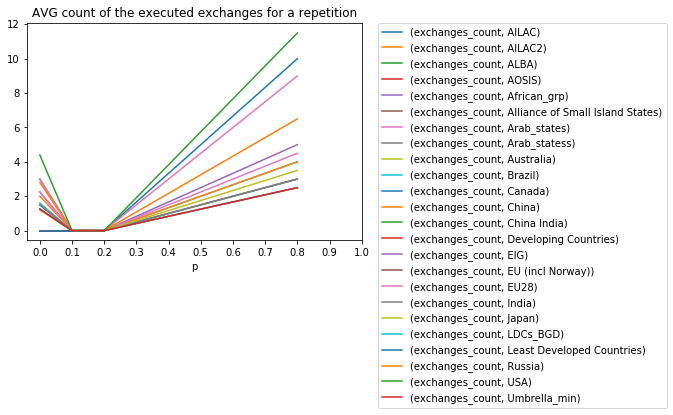

In [4]:
plt = df_exchanges_count.plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('AVG count of the executed exchanges for a repetition')
plt.set_xticks([x*0.10 for x in range(11)])
plt

In [5]:
pd_utility_sum = pd.pivot_table(df, index=['p'], columns=['actor'], values=['utility_sum'])
pd_utility_sum

utility_sum                                            \
actor       AILAC    AILAC2      ALBA     AOSIS African_grp   
p                                                             
0.0      0.216425  0.026949  0.063590  0.060076    0.443073   
0.1      0.014166       NaN  0.001842  0.008528    0.007293   
0.2      0.012857       NaN  0.002120  0.008818    0.006417   
0.8      0.692462  0.028323  0.144098  0.131382    0.881098   

                                                                          \
actor Alliance of Small Island States Arab_states Arab_statess Australia   
p                                                                          
0.0                          0.006953    0.397285     0.025927  0.001163   
0.1                          0.006510    0.013301          NaN  0.001111   
0.2                          0.007262    0.014140          NaN  0.001195   
0.8                               NaN    1.157764     0.026373       NaN   

                    ...                                                      \
actor    Brazil     ...            EIG EU (incl Norway)      EU28     India   
p                   ...                                                       
0.0    0.206496     ...       0.131236         0.015618  0.551343  0.191631   
0.1    0.009112     ...       0.006781         0.015382  0.021065  0.002538   
0.2    0.009021     ...       0.006996         0.015040  0.019730  0.002293   
0.8    0.586534     ...       0.278250              NaN  1.096522  0.340010   

                                                                         \
actor     Japan  LDCs_BGD Least Developed Countries    Russia       USA   
p                                                                         
0.0    0.115126  0.077850                  0.006767  0.396287  1.161728   
0.1    0.009277  0.011039                  0.006930  0.014105  0.045751   
0.2    0.008181  0.012469                  0.005930  0.013972  0.045806   
0.8    0.316419  0.154875                       NaN  1.082036  3.223325   

                    
actor Umbrella_min  
p                   
0.0       0.108337  
0.1       0.005375  
0.2       0.006419  
0.8       0.256886  

[4 rows x 24 columns]

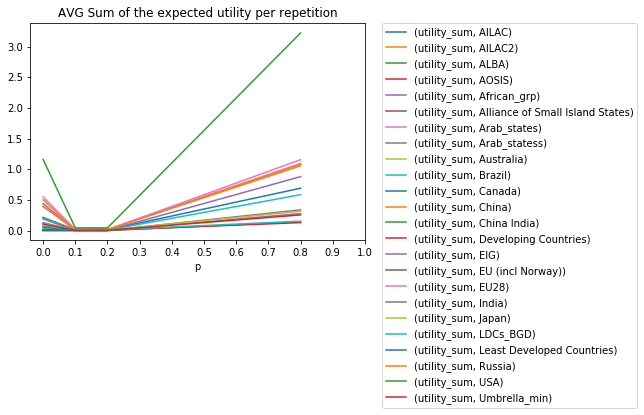

In [6]:
plt = pd_utility_sum.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('AVG Sum of the expected utility per repetition')
plt.set_xticks([x*0.10 for x in range(11)])
plt

In [7]:
pd_utility_avg = pd.pivot_table(df, index=['p'], columns=['actor'], values=['utility_avg'])
pd_utility_avg



utility_avg                                            \
actor       AILAC    AILAC2      ALBA     AOSIS African_grp   
p                                                             
0.0      0.144133  0.120848  0.039991  0.162397    0.124588   
0.1      0.117078       NaN  0.031224  0.135360    0.078421   
0.2      0.113781       NaN  0.034196  0.160326    0.066839   
0.8      0.067255  0.109356  0.040514  0.094807    0.132181   

                                                                          \
actor Alliance of Small Island States Arab_states Arab_statess Australia   
p                                                                          
0.0                          0.278121    0.178557     0.148153  0.038775   
0.1                          0.260392    0.149453          NaN  0.035824   
0.2                          0.302579    0.158879          NaN  0.044263   
0.8                               NaN    0.116300     0.143334       NaN   

                    ...                                                      \
actor    Brazil     ...            EIG EU (incl Norway)      EU28     India   
p                   ...                                                       
0.0    0.142176     ...       0.108324         0.363205  0.235111  0.092021   
0.1    0.112113     ...       0.094182         0.313912  0.219425  0.056391   
0.2    0.126084     ...       0.097166         0.341824  0.184392  0.065514   
0.8    0.157177     ...       0.090377              NaN  0.207262  0.097043   

                                                                         \
actor     Japan  LDCs_BGD Least Developed Countries    Russia       USA   
p                                                                         
0.0    0.172614  0.119483                  0.218275  0.159694  0.370331   
0.1    0.140621  0.114989                  0.238948  0.112744  0.427947   
0.2    0.130182  0.122248                  0.185312  0.112706  0.452691   
0.8    0.117705  0.093491                       NaN  0.183541  0.293188   

                    
actor Umbrella_min  
p                   
0.0       0.107829  
0.1       0.089588  
0.2       0.110671  
0.8       0.098008  

[4 rows x 24 columns]

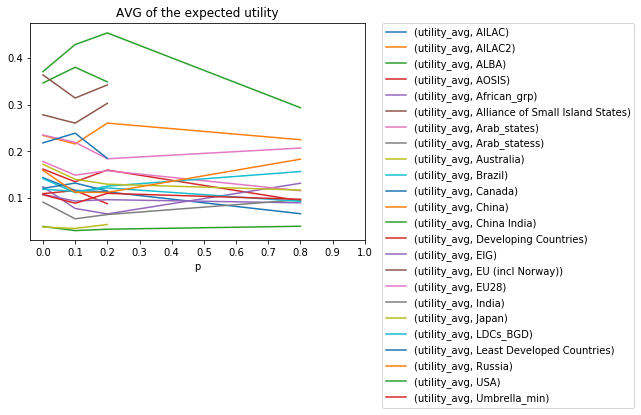

In [8]:
plt = pd_utility_avg.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('AVG of the expected utility')
plt.set_xticks([x*0.10 for x in range(11)])
plt